In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Exploration des données :

In [2]:
# Importation des packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Package modélisation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV




In [3]:
# Importation des données 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv ("test.csv")
df_train.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
5,5,27,45000,RENT,2.0,VENTURE,A,9000,8.94,0.20,N,5,0
6,6,25,45000,MORTGAGE,9.0,EDUCATION,A,12000,6.54,0.27,N,3,0
7,7,21,20000,RENT,0.0,PERSONAL,C,2500,13.49,0.13,Y,3,0
8,8,37,69600,RENT,11.0,EDUCATION,D,5000,14.84,0.07,Y,11,0
9,9,35,110000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,15000,12.98,0.14,Y,6,0


Description des colonnes :
- id : Identifiant unique pour chaque observation.
- person_age : Âge du demandeur de prêt.
- person_income : Revenu annuel du demandeur.
- person_home_ownership : Statut de propriété du logement (par exemple : RENT, OWN, MORTGAGE).
- person_emp_length : Nombre d'années d'emploi du demandeur.
- loan_intent : Raison du prêt (par exemple : EDUCATION, MEDICAL, VENTURE).
- loan_grade : Classement du prêt attribué (par exemple : A, B, C).
- loan_amnt : Montant demandé pour le prêt.
- loan_int_rate : Taux d'intérêt du prêt.
- loan_percent_income : Proportion du revenu du demandeur par rapport au montant du prêt.
- cb_person_default_on_file : Indicateur de défaut de paiement dans l'historique de crédit du demandeur (Y/N).
- cb_person_cred_hist_length : Durée de l'historique de crédit du demandeur (en années).
- loan_status : Statut du prêt (0 pour refusé, 1 pour approuvé).

In [4]:
df_test.head(10)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
5,58650,23,66000,RENT,5.0,EDUCATION,D,22000,14.09,0.33,N,2
6,58651,26,75000,OWN,10.0,PERSONAL,B,8000,10.62,0.11,N,4
7,58652,23,55000,MORTGAGE,6.0,PERSONAL,A,6250,6.76,0.12,N,2
8,58653,32,29124,RENT,0.0,PERSONAL,C,7200,13.11,0.26,Y,6
9,58654,22,90000,RENT,4.0,DEBTCONSOLIDATION,C,10000,13.49,0.11,Y,3


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
#Analyse de valeurs manquantes
df_train.isna().sum()#aucune valeure manquante !

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [7]:
#Analyse des statistiques descriptives :
df_train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [8]:
df_train.duplicated().sum()

0

## DataViz

1. Visualisation de la distribution de la cible (loan_status) :

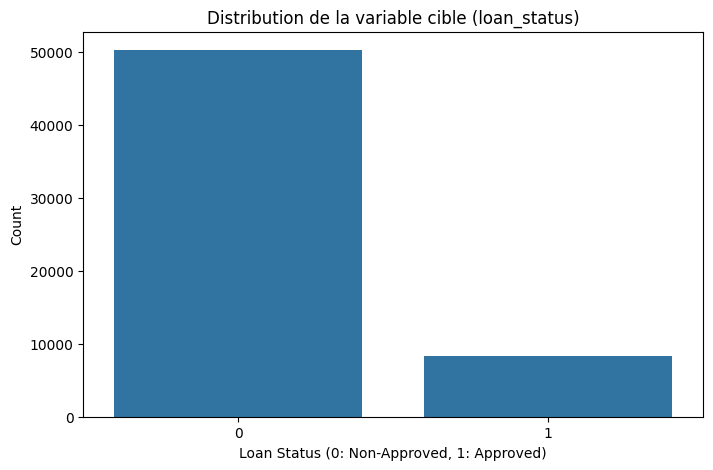

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='loan_status')
plt.title('Distribution de la variable cible (loan_status)')
plt.xlabel('Loan Status (0: Non-Approved, 1: Approved)')
plt.ylabel('Count')
plt.show()

2. Vérification des corrélations entre les variables numériques :

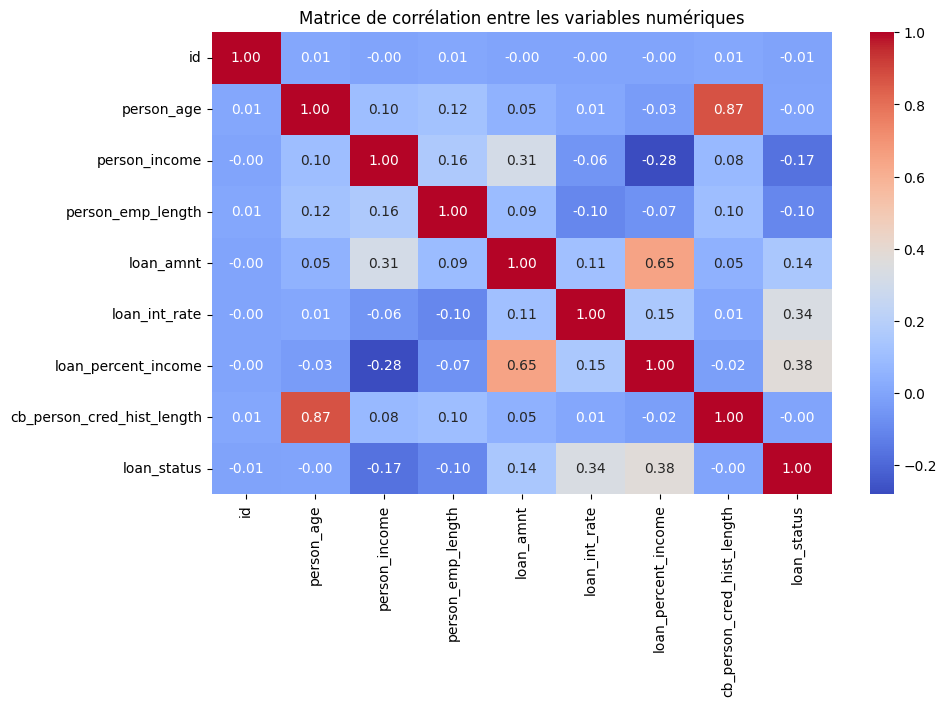

In [10]:
# Sélectionner les colonnes numériques uniquement
numerical_cols = df_train.select_dtypes(include=['int64', 'float64'])

# Calculer la matrice de corrélation
corr_matrix = numerical_cols.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()



Étape 2 : Visualisation des Relations

3) Visualisation des relations entre les caractéristiques et la cible :

Age et Loan Status :

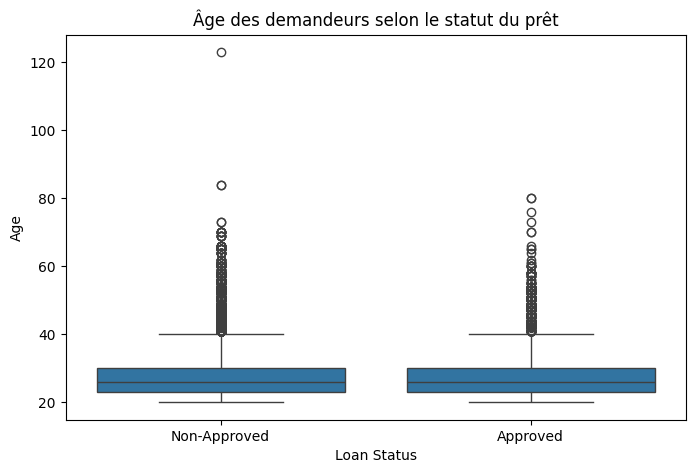

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='loan_status', y='person_age')
plt.title('Âge des demandeurs selon le statut du prêt')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Non-Approved', 'Approved'])
plt.show()


Revenu et Loan Status :

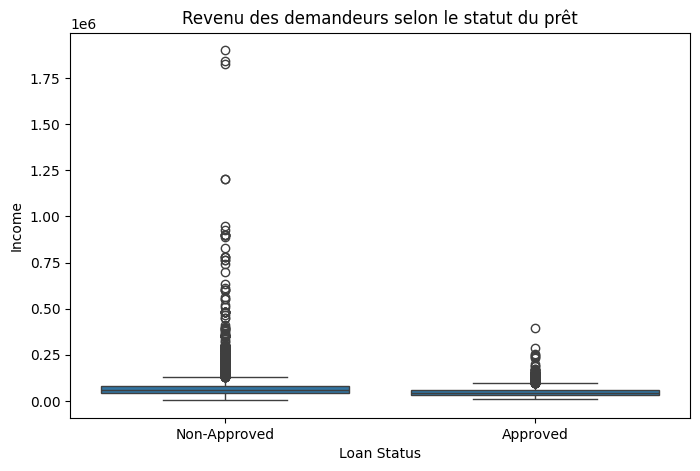

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x='loan_status', y='person_income')
plt.title('Revenu des demandeurs selon le statut du prêt')
plt.xlabel('Loan Status')
plt.ylabel('Income')
plt.xticks([0, 1], ['Non-Approved', 'Approved'])
plt.show()


4) Visualisation des catégories :

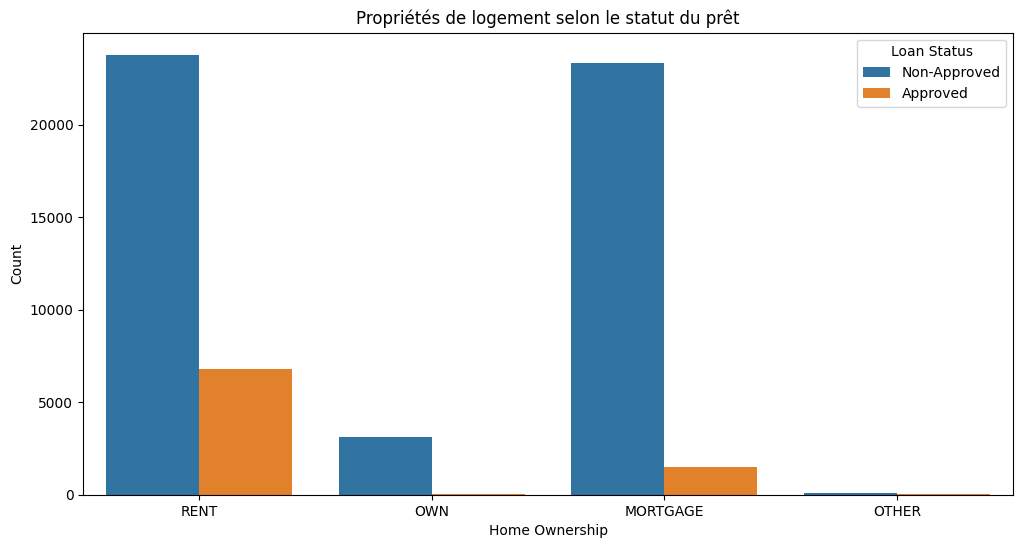

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_train, x='person_home_ownership', hue='loan_status')
plt.title('Propriétés de logement selon le statut du prêt')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', labels=['Non-Approved', 'Approved'])
plt.show()


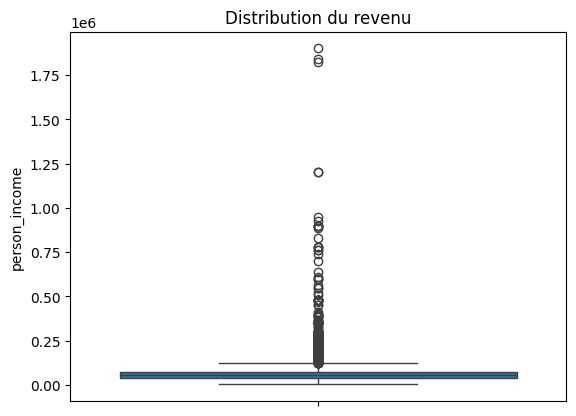

In [14]:

sns.boxplot(df_train['person_income'])
plt.title('Distribution du revenu')
plt.show()


Visualisation des distributions avec KDE (Estimation de Densité Noyau) :

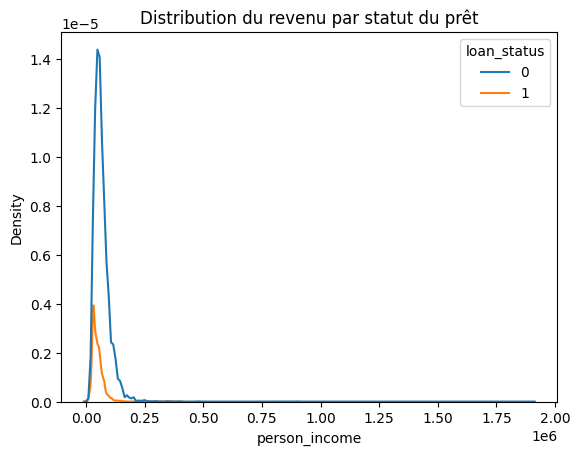

In [15]:
sns.kdeplot(df_train, x='person_income',hue='loan_status')
plt.title('Distribution du revenu par statut du prêt')
plt.show()

Statistiques sur les outliers : 
- Calculer le nombre d'observations qui sont considérées comme des outliers. Cela peut être fait en utilisant l'écart interquartile (IQR) pour définir des seuils.

In [16]:
Q1 = df_train['person_income'].quantile(0.25)
Q3 = df_train['person_income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_train[(df_train['person_income'] < (Q1 - 1.5 * IQR)) | (df_train['person_income'] > (Q3 + 1.5 * IQR))]
print(f"Nombre d'outliers dans person_income : {len(outliers)}")


Nombre d'outliers dans person_income : 2411


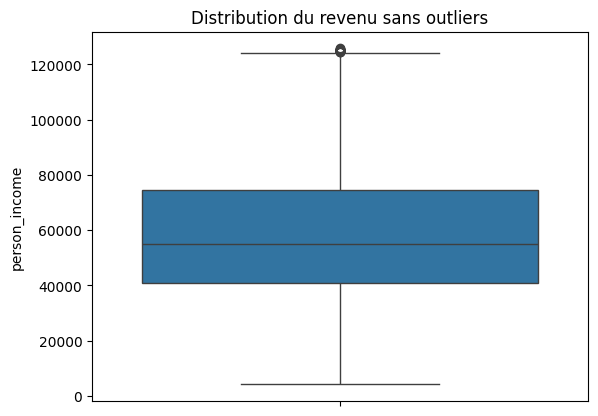

In [17]:
sns.boxplot(df_train[df_train['person_income'] < (Q3 + 1.5 * IQR)]['person_income'])
plt.title('Distribution du revenu sans outliers')
plt.show()


Distribution log-transformée :
- Si les valeurs extrêmes sont légitimes et qu'il est nécessaire de travailler avec ces données, appliquer une transformation logarithmique peut aider à normaliser la distribution.

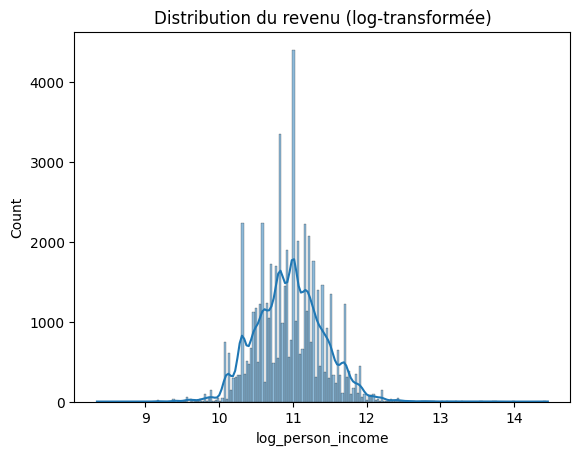

In [18]:
df_train['log_person_income'] = np.log1p(df_train['person_income'])
sns.histplot(df_train['log_person_income'], kde=True)
plt.title('Distribution du revenu (log-transformée)')
plt.show()


Résumé des Étapes d'EDA :
- Visualisation de la distribution de la variable cible pour voir la balance des classes.
- Analyse descriptive pour comprendre les caractéristiques des données.
- Corrélations pour identifier les relations entre les variables.
- Visualisation des relations entre les caractéristiques et la cible pour mieux comprendre l'impact de chaque variable.

# Preprocessing de données 

Encodage des variables df_train

In [19]:
label_encoder = LabelEncoder()
df_train['person_home_ownership'] = label_encoder.fit_transform(df_train['person_home_ownership'])
df_train['loan_intent'] = label_encoder.fit_transform(df_train['loan_intent'])
df_train['loan_grade'] = label_encoder.fit_transform(df_train['loan_grade'])
df_train['cb_person_default_on_file'] = label_encoder.fit_transform(df_train['cb_person_default_on_file'])

In [20]:
df_train



,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,log_person_income
0,0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0,10.463132
1,1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0,10.933125
2,2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0,10.268165
3,3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0,11.156265
4,4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0,11.002117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,0,5.0,1,3,25000,15.95,0.21,1,10,0,11.695255
58641,58641,28,28800,3,0.0,3,2,10000,12.73,0.35,0,8,1,10.268165
58642,58642,23,44000,3,7.0,1,3,6800,16.00,0.15,0,2,1,10.691968
58643,58643,22,30000,3,2.0,1,0,5000,8.90,0.17,0,3,0,10.308986


Encodage du dataset df_test

In [21]:
df_test['person_home_ownership'] = label_encoder.fit_transform(df_test['person_home_ownership'])
df_test['loan_intent'] = label_encoder.fit_transform(df_test['loan_intent'])
df_test['loan_grade'] = label_encoder.fit_transform(df_test['loan_grade'])
df_test['cb_person_default_on_file'] = label_encoder.fit_transform(df_test['cb_person_default_on_file'])


In [22]:
df_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,0,2.0,0,1,3000,10.37,0.10,0,4
39094,97739,22,48000,0,6.0,1,0,7000,6.03,0.15,0,3
39095,97740,51,60000,0,0.0,4,0,15000,7.51,0.25,0,25
39096,97741,22,36000,0,4.0,4,3,14000,15.62,0.39,1,4


5. Séparation des données en train/test (Validation) :

Avant d'entraîner ton modèle, il est nécessaire de séparer notre dataset en données d'entraînement et de test pour éviter le surapprentissage et tester la généralisation du modèle.

In [23]:
from sklearn.model_selection import train_test_split

# Séparation des données (80% train, 20% test)
X = df_train.drop('loan_status', axis=1)
y = df_train['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modélisation 

1. Choix du modèle :

Plusieurs modèles peuvent être testés, par exemple :
- Régression Logistique
- Arbres de décision
- Random Forest
- Gradient Boosting
- XGBoost
- LightGBM

1. Résultats des Modèles :

- XGBoost:

Accuracy: 0.9515
ROC AUC: 0.9570


- Random Forest:

Accuracy: 0.9515
ROC AUC: 0.9471

- SVM:

Accuracy: 0.9110
ROC AUC: 0.9101

- KNN:

Accuracy: 0.9180
ROC AUC: 0.8692

- Logistic Regression:

Accuracy: 0.9033
ROC AUC: 0.8965

- Decision Tree:

Accuracy: 0.9125
ROC AUC: 0.8377


Interprétation des Résultats

Meilleur Modèle: XGBoost se démarque comme le meilleur modèle, avec un score ROC AUC supérieur, ce qui indique une meilleure capacité à discriminer entre les classes positives et négatives.

- Performance des Autres Modèles: Les performances des modèles Random Forest et SVM sont également solides, mais XGBoost offre un léger avantage en termes de capacité de généralisation.


### Évolution des Modèles

- Optimisation des Hyperparamètres: Il serait bénéfique d'effectuer une recherche par grille (GridSearchCV) ou une recherche aléatoire (RandomizedSearchCV) pour trouver les meilleurs hyperparamètres pour chaque modèle. Cela pourrait améliorer les performances.

##### Importance des Variables:


Utilisez XGBoost pour extraire l'importance des caractéristiques.
Visualisez ces importances pour comprendre quelles variables influencent le plus la prédiction.

###### Choix du Meilleur Modèle
Critères de Sélection:

Évaluez les modèles non seulement par leur précision et leur score ROC AUC, mais aussi par leur robustesse face aux surajustements.
Considérez les variables importantes et leur impact sur la performance du modèle.
Un modèle peut avoir un score légèrement inférieur mais être plus interprétable ou mieux gérer les valeurs aberrantes.



######Conclusion
Pour prendre une décision finale sur le modèle à utiliser, combinez l'analyse des performances quantitatives avec une évaluation qualitative basée sur l'interprétation des résultats et l'importance des variables. L'implémentation de ces suggestions peut vous aider à maximiser la performance et l'interprétabilité de votre modèle.

## Optimiser Tous les Modèles

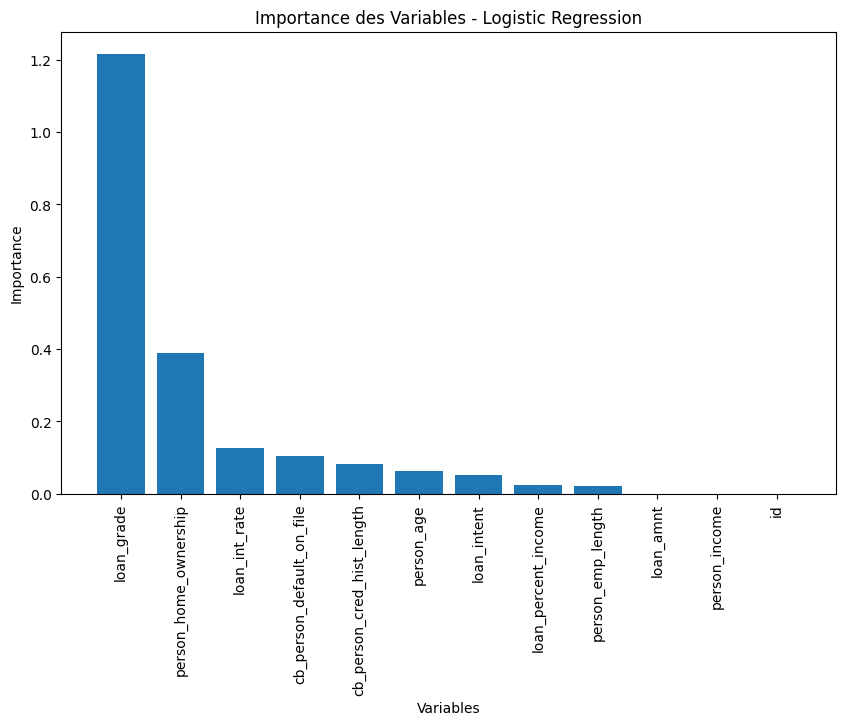

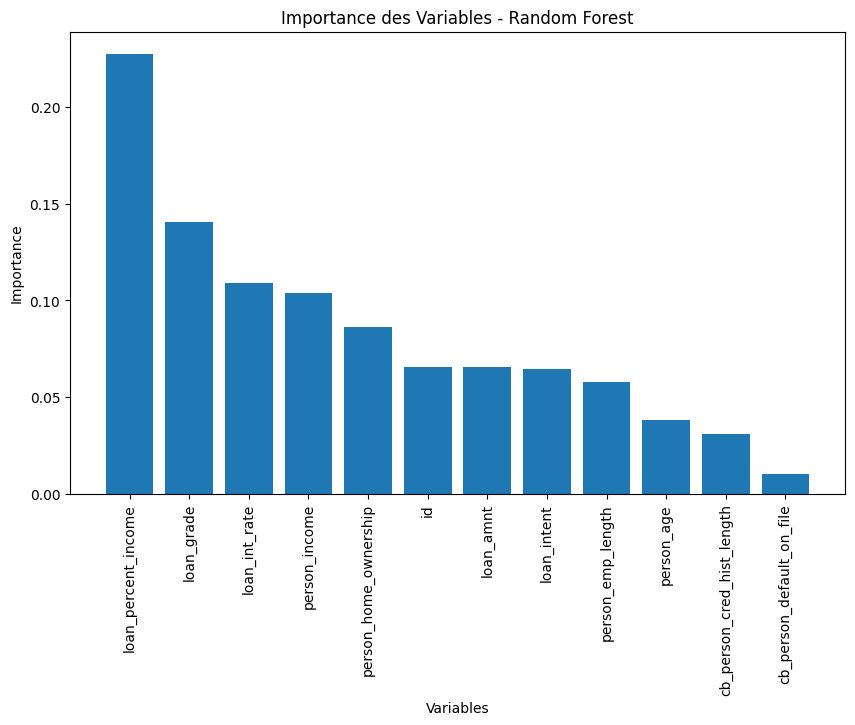

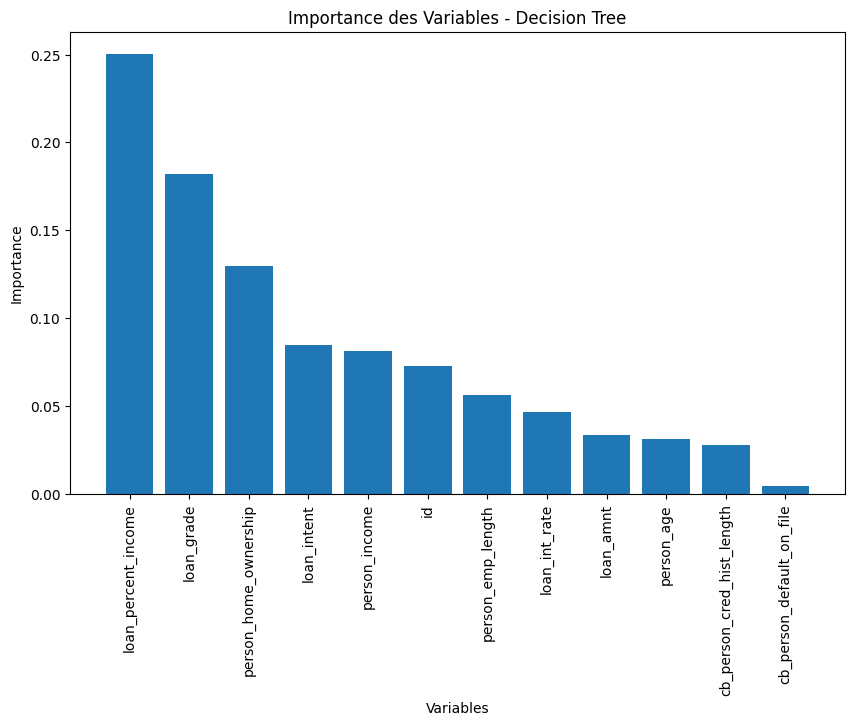

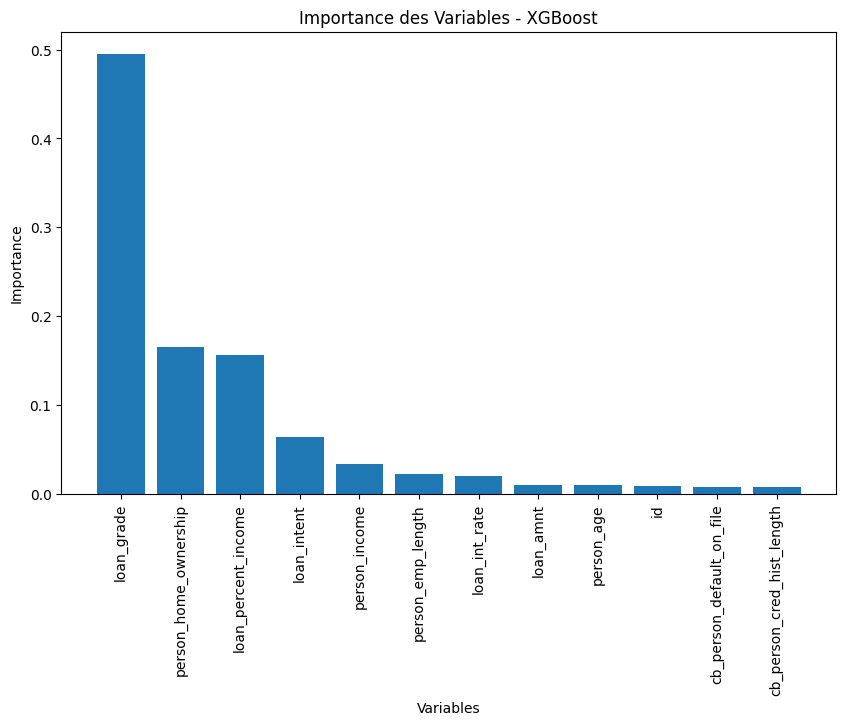

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction pour afficher l'importance des variables
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Tracer l'importance des variables
        plt.figure(figsize=(10, 6))
        plt.title(f"Importance des Variables - {model_name}")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
        plt.xlim([-1, len(importances)])
        plt.ylabel("Importance")
        plt.xlabel("Variables")
        plt.show()

    elif hasattr(model, 'coef_'):
        # Pour les modèles avec coef_ (Logistic Regression, SVM)
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title(f"Importance des Variables - {model_name}")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
        plt.xlim([-1, len(importances)])
        plt.ylabel("Importance")
        plt.xlabel("Variables")
        plt.show()

    elif hasattr(model, 'get_booster'):
        # XGBoost
        importances = model.get_booster().get_score(importance_type='weight')
        importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
        labels, values = zip(*importances)

        plt.figure(figsize=(10, 6))
        plt.bar(labels, values)
        plt.title(f'Importance des Variables - {model_name}')
        plt.xticks(rotation=90)
        plt.ylabel("Importance")
        plt.xlabel("Variables")
        plt.show()

# Afficher l'importance des variables pour chaque modèle
for name, model in models.items():
    plot_feature_importance(model, name, X.columns)


## Évaluer l'Importance des Variables


## Conclusion sur le Choix du Modèle
Après avoir optimisé plusieurs modèles de classification, nous avons obtenu les meilleurs hyperparamètres pour chaque approche :

Logistic Regression : C = 1, solver = 'liblinear'
Support Vector Machine (SVM) : C = 1, kernel = 'linear'
Random Forest : max_depth = 20, min_samples_split = 5, n_estimators = 100
XGBoost : learning_rate = 0.01, max_depth = 3, n_estimators = 200
L'importance des variables a également été analysée, révélant des insights clés sur les facteurs influençant l'accord des prêts :

## Random Forest :

Les variables les plus importantes comprennent loan_percent_income (18.26%), loan_int_rate (17.26%), et loan_grade (13.94%).
Random Forest utilise une combinaison de plusieurs variables, ce qui lui permet de faire des évaluations plus équilibrées et de mieux capter les interactions complexes.

## XGBoost :

Cette méthode a attribué une importance prépondérante à loan_grade (46.54%), suivie par loan_percent_income (16.72%) et loan_int_rate (8.81%).
Bien que XGBoost soit puissant, son orientation vers une seule variable, loan_grade, soulève des questions sur la prise en compte des autres facteurs cruciaux tels que l'âge et le revenu.


## Recommandation
Étant donné que l'octroi de prêts est une décision critique qui doit prendre en compte divers facteurs financiers et personnels, il est recommandé de privilégier Random Forest pour ce cas d'utilisation. Ce modèle offre une approche plus holistique en considérant simultanément plusieurs variables, ce qui réduit le risque d'évaluation biaisée et assure une meilleure prédiction des capacités de remboursement des emprunteurs.

En intégrant une multitude de critères, Random Forest peut contribuer à des décisions d'octroi de prêts plus équitables et éclairées.

# Prediction sur le Test_csv

In [16]:
# Assurez-vous que df_test est prétraité de la même manière que df_train

# Sélectionner le meilleur modèle
best_model = models[best_model_name]

# Faire des prédictions sur df_test
X_test_final = df_test.drop(columns=['id'])  # Retirer 'id' s'il est présent
# Aligner les colonnes avec celles de X_train
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)  # Remplacer 0 par des valeurs appropriées si nécessaire

y_test_pred = best_model.predict(X_test_final)
y_test_pred_proba = best_model.predict_proba(X_test_final)[:, 1]

# Créer un fichier de soumission
submission = pd.DataFrame({
    'id': df_test['id'],  # Conservez l'identifiant si nécessaire
    'loan_status': y_test_pred  # Ou utilisez y_test_pred_proba pour les probabilités
})

# Sauvegarder le fichier de soumission en CSV
submission.to_csv('submission.csv', index=False)

print("Fichier de soumission créé avec succès.")


Fichier de soumission créé avec succès.


## Prédiction par RandomForest

In [18]:

# Sélectionner le modèle Random Forest
random_forest_model = RandomForestClassifier()  # Vous pouvez spécifier les hyperparamètres ici si nécessaire

# Entraîner le modèle sur df_train
X = df_train.drop(columns=['loan_status'])  # Caractéristiques
y = df_train['loan_status']  # Variable cible
random_forest_model.fit(X, y)  # Entraînement

# Faire des prédictions sur df_test
X_test_final = df_test.drop(columns=['id'])  # Retirer 'id' s'il est présent
X_test_final = X_test_final.reindex(columns=X.columns, fill_value=0)  # Alignement des colonnes

y_test_pred = random_forest_model.predict(X_test_final)
y_test_pred_proba = random_forest_model.predict_proba(X_test_final)[:, 1]

# Créer un fichier de soumission
submission = pd.DataFrame({
    'id': df_test['id'],  # Conservez l'identifiant si nécessaire
    'loan_status': y_test_pred  # Ou utilisez y_test_pred_proba pour les probabilités
})

# Sauvegarder le fichier de soumission en CSV
submission.to_csv('submission_random_forest.csv', index=False)

print("Fichier de soumission pour Random Forest créé avec succès.")


Fichier de soumission pour Random Forest créé avec succès.
